In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [63]:
dataset = pd.read_csv('/content/Bank Customer Churn Prediction.csv')
dataset.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
dataset.drop(['country'], axis=1, inplace=True)

In [67]:
dataset.head(3)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1


In [68]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

In [69]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2, random_state= 42)

In [70]:
ss = StandardScaler()
new_data = pd.DataFrame(ss.fit_transform(x), columns=x.columns)
new_data

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...,...
9995,-1.177652,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.682806,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,-1.479282,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,-0.119356,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [81]:
x_test

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
6252,15687492,596,32,3,96709.07,2,0,0,41788.37
4684,15736963,623,43,1,0.00,2,1,1,146379.30
1731,15721730,601,44,4,0.00,2,1,0,58561.31
4742,15762134,506,59,8,119152.10,2,1,1,170679.74
4521,15648898,560,27,7,124995.98,1,1,1,114669.79
...,...,...,...,...,...,...,...,...,...
6412,15598982,602,53,5,98268.84,1,0,1,45038.29
8285,15572631,609,25,10,0.00,1,0,1,109895.16
7853,15746674,730,47,7,0.00,1,1,0,33373.26
1095,15689081,692,29,4,0.00,1,1,0,76755.99


In [141]:
import tensorflow
from keras.layers import Dense, Normalization
from keras.models import Sequential
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [142]:
ann = Sequential()
# Use lowercase l2 consistently
# normalixation layer is used to remove varnashing problem in the hidden layers
ann.add(Dense(8, input_dim = 9, activation = 'relu',kernel_regularizer=l2(0.01)))
ann.add(Normalization())
ann.add(Dense(4, activation = 'relu',kernel_regularizer=l2(0.01)))
ann.add(Normalization())
ann.add(Dense(2 , activation = 'relu',kernel_regularizer=l2(0.01)))
ann.add(Normalization())
ann.add(Dense(1 , activation ='sigmoid'))

In [143]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [144]:
# here we used early stoping to stop model early where accuracy is over fitting not occurs
ann.fit(x_train, y_train, batch_size= 100, epochs=100, validation_data=(x_test, y_test), callbacks=EarlyStopping())

Epoch 1/100
80/80 [==============================] - 1s 6ms/step - loss: 4363.1938 - accuracy: 0.6413 - val_loss: 0.8138 - val_accuracy: 0.8035
Epoch 2/100
80/80 [==============================] - 0s 3ms/step - loss: 0.7896 - accuracy: 0.7945 - val_loss: 0.7653 - val_accuracy: 0.8035
Epoch 3/100
80/80 [==============================] - 0s 3ms/step - loss: 1.2470 - accuracy: 0.7945 - val_loss: 0.7274 - val_accuracy: 0.8035
Epoch 4/100
80/80 [==============================] - 0s 3ms/step - loss: 0.7145 - accuracy: 0.7945 - val_loss: 0.6980 - val_accuracy: 0.8035
Epoch 5/100
80/80 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.7945 - val_loss: 0.6740 - val_accuracy: 0.8035
Epoch 6/100
80/80 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.7945 - val_loss: 0.6540 - val_accuracy: 0.8035
Epoch 7/100
80/80 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.7945 - val_loss: 0.6374 - val_accuracy: 0.8035
Epoch 8/10

In [131]:
training_model_accuracy = ann.history.history['accuracy']
testing_model_accuracy = ann.history.history['val_accuracy']

In [132]:
len(testing_model_accuracy)

37

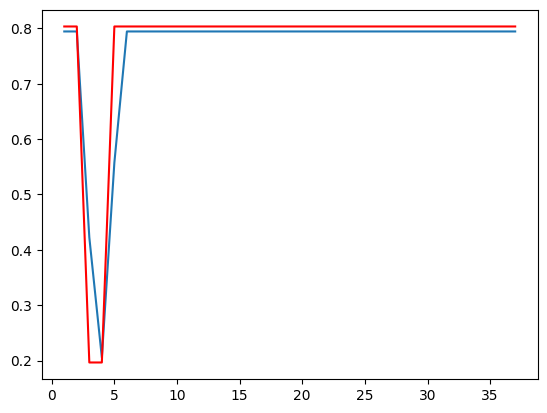

In [133]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(1,38)], training_model_accuracy)
plt.plot([i for i in range(1,38)], testing_model_accuracy, c='red')
plt.show()

In [134]:
pred1= ann.predict(x_train)
pred_data1=[]
for i in pred1:
    if i[0]> 0.5:
        pred_data1.append(1)
    else:
        pred_data1.append(0)


250/250 [==============================] - 0s 1ms/step


In [135]:
pred= ann.predict(x_test)
pred_data=[]
for i in pred:
    if i[0]> 0.5:
        pred_data.append(1)
    else:
        pred_data.append(0)

63/63 [==============================] - 0s 1ms/step


In [136]:
pred_data

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [137]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred_data)

0.8035

In [138]:
accuracy_score(y_train, pred_data1)

0.7945

In [139]:
pred= ann.predict([[6252,15687492,596,32,3,96709.07,2,0,41788.37]])
pred_data=[]
for i in pred:
    if i[0]> 0.5:
        pred_data.append(1)
    else:
        pred_data.append(0)
pred_data

1/1 [==============================] - 0s 344ms/step


[0]